In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda,ConvLSTM2D,LSTM,Reshape
from keras import backend as K
import tensorflow as tf
from tensorflow.keras.layers import MaxPooling3D,Conv3D,Conv3DTranspose

In [ ]:
from keras.utils import normalize
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
image_directory='/content/drive/MyDrive/rgb_indv'
mask_directory='/content/drive/MyDrive/masks'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
SIZE = 512
image_dataset = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.  
mask_dataset = []  #Place holders to define add labels. We will add 0 to all parasitized images and 1 to uninfected.

In [ ]:

path_images=[
 '/content/drive/MyDrive/rgb_indv/abukebir/im1',
 '/content/drive/MyDrive/rgb_indv/abukebir/im2',
 '/content/drive/MyDrive/rgb_indv/abukebir/im3',
 '/content/drive/MyDrive/rgb_indv/abukebir/im4',
 '/content/drive/MyDrive/rgb_indv/abukebir/im5',
 '/content/drive/MyDrive/rgb_indv/abukebir/im6',
 '/content/drive/MyDrive/rgb_indv/annubariyah/im1',
 '/content/drive/MyDrive/rgb_indv/annubariyah/im2',
 '/content/drive/MyDrive/rgb_indv/annubariyah/im3',
 '/content/drive/MyDrive/rgb_indv/annubariyah/im4',
 '/content/drive/MyDrive/rgb_indv/banha/im1',
 '/content/drive/MyDrive/rgb_indv/banha/im2',
 '/content/drive/MyDrive/rgb_indv/banha/im3',
 '/content/drive/MyDrive/rgb_indv/banha/im4',
 '/content/drive/MyDrive/rgb_indv/banha/im5',
 '/content/drive/MyDrive/rgb_indv/banha/im6',
 '/content/drive/MyDrive/rgb_indv/beheira_etay/im1',
 '/content/drive/MyDrive/rgb_indv/beheira_etay/im2',
 '/content/drive/MyDrive/rgb_indv/beheira_etay/im3',
 '/content/drive/MyDrive/rgb_indv/beheira_etay/im4',
 '/content/drive/MyDrive/rgb_indv/beheira_etay/im5',
 '/content/drive/MyDrive/rgb_indv/beheira_etay/im6',
 '/content/drive/MyDrive/rgb_indv/beheria_qarya/im1',
 '/content/drive/MyDrive/rgb_indv/beheria_qarya/im2',
 '/content/drive/MyDrive/rgb_indv/beheria_qarya/im3',
 '/content/drive/MyDrive/rgb_indv/beheria_qarya/im4',
 '/content/drive/MyDrive/rgb_indv/beheria_qarya/im5',
 '/content/drive/MyDrive/rgb_indv/beheria_qarya/im6',
 '/content/drive/MyDrive/rgb_indv/bishla/im1',
 '/content/drive/MyDrive/rgb_indv/bishla/im2',
 '/content/drive/MyDrive/rgb_indv/bishla/im3',
 '/content/drive/MyDrive/rgb_indv/bishla/im4',
 '/content/drive/MyDrive/rgb_indv/bishla/im5',
 '/content/drive/MyDrive/rgb_indv/bishla/im6',
 '/content/drive/MyDrive/rgb_indv/biyla/im1',
 '/content/drive/MyDrive/rgb_indv/biyla/im2',
 '/content/drive/MyDrive/rgb_indv/biyla/im3',
 '/content/drive/MyDrive/rgb_indv/biyla/im4',
 '/content/drive/MyDrive/rgb_indv/biyla/im5',
 '/content/drive/MyDrive/rgb_indv/biyla/im6',
 '/content/drive/MyDrive/rgb_indv/blbes/im1',
 '/content/drive/MyDrive/rgb_indv/blbes/im2',
 '/content/drive/MyDrive/rgb_indv/blbes/im3',
 '/content/drive/MyDrive/rgb_indv/blbes/im4',
 '/content/drive/MyDrive/rgb_indv/damanhour/im1',
 '/content/drive/MyDrive/rgb_indv/damanhour/im2',
 '/content/drive/MyDrive/rgb_indv/damanhour/im3',
 '/content/drive/MyDrive/rgb_indv/damanhour/im4',
 '/content/drive/MyDrive/rgb_indv/damanhour/im5',
 '/content/drive/MyDrive/rgb_indv/damanhour/im6',
 '/content/drive/MyDrive/rgb_indv/damietta/im1',
 '/content/drive/MyDrive/rgb_indv/damietta/im2',
 '/content/drive/MyDrive/rgb_indv/damietta/im3',
 '/content/drive/MyDrive/rgb_indv/damietta/im4',
 '/content/drive/MyDrive/rgb_indv/damietta/im5',
 '/content/drive/MyDrive/rgb_indv/damietta/im6',
 '/content/drive/MyDrive/rgb_indv/elkasasin/im1',
 '/content/drive/MyDrive/rgb_indv/elkasasin/im2',
 '/content/drive/MyDrive/rgb_indv/elkasasin/im3',
 '/content/drive/MyDrive/rgb_indv/elkasasin/im4',
 '/content/drive/MyDrive/rgb_indv/elkasasin/im5',
 '/content/drive/MyDrive/rgb_indv/elkasasin/im6',
 '/content/drive/MyDrive/rgb_indv/fayoum/im1',
 '/content/drive/MyDrive/rgb_indv/fayoum/im2',
 '/content/drive/MyDrive/rgb_indv/fayoum/im3',
 '/content/drive/MyDrive/rgb_indv/fayoum/im4',
 '/content/drive/MyDrive/rgb_indv/fayoum/im5',
 '/content/drive/MyDrive/rgb_indv/fayoum/im6',
 '/content/drive/MyDrive/rgb_indv/gamaleya/im1',
 '/content/drive/MyDrive/rgb_indv/gamaleya/im2',
 '/content/drive/MyDrive/rgb_indv/gamaleya/im3',
 '/content/drive/MyDrive/rgb_indv/gamaleya/im4',
 '/content/drive/MyDrive/rgb_indv/gamaleya/im5',
 '/content/drive/MyDrive/rgb_indv/gamaleya/im6',
 '/content/drive/MyDrive/rgb_indv/geiza/im1',
 '/content/drive/MyDrive/rgb_indv/geiza/im2',
 '/content/drive/MyDrive/rgb_indv/geiza/im3',
 '/content/drive/MyDrive/rgb_indv/geiza/im4',
 '/content/drive/MyDrive/rgb_indv/geiza/im5',
 '/content/drive/MyDrive/rgb_indv/geiza/im6',
 '/content/drive/MyDrive/rgb_indv/housh_eissa/im1',
 '/content/drive/MyDrive/rgb_indv/housh_eissa/im2',
 '/content/drive/MyDrive/rgb_indv/housh_eissa/im3',
 '/content/drive/MyDrive/rgb_indv/housh_eissa/im4',
 '/content/drive/MyDrive/rgb_indv/housh_eissa/im5',
 '/content/drive/MyDrive/rgb_indv/housh_eissa/im6',
 '/content/drive/MyDrive/rgb_indv/kafr_eldawar/im1',
 '/content/drive/MyDrive/rgb_indv/kafr_eldawar/im2',
 '/content/drive/MyDrive/rgb_indv/kafr_eldawar/im3',
 '/content/drive/MyDrive/rgb_indv/kafr_eldawar/im4',
 '/content/drive/MyDrive/rgb_indv/kafr_eldawar/im5',
 '/content/drive/MyDrive/rgb_indv/kafr_eldawar/im6',
 '/content/drive/MyDrive/rgb_indv/kafr_elsheikh/im1',
 '/content/drive/MyDrive/rgb_indv/kafr_elsheikh/im2',
 '/content/drive/MyDrive/rgb_indv/kafr_elsheikh/im3',
 '/content/drive/MyDrive/rgb_indv/kafr_elsheikh/im4',
 '/content/drive/MyDrive/rgb_indv/kafr_elsheikh/im5',
 '/content/drive/MyDrive/rgb_indv/kafr_elsheikh/im6',
 '/content/drive/MyDrive/rgb_indv/mansoura/im1',
 '/content/drive/MyDrive/rgb_indv/mansoura/im2',
 '/content/drive/MyDrive/rgb_indv/mansoura/im3',
 '/content/drive/MyDrive/rgb_indv/mansoura/im4',
 '/content/drive/MyDrive/rgb_indv/mansoura/im5',
 '/content/drive/MyDrive/rgb_indv/mansoura/im6',
 '/content/drive/MyDrive/rgb_indv/mutubas/im1',
 '/content/drive/MyDrive/rgb_indv/mutubas/im2',
 '/content/drive/MyDrive/rgb_indv/mutubas/im3',
 '/content/drive/MyDrive/rgb_indv/mutubas/im4',
 '/content/drive/MyDrive/rgb_indv/mutubas/im5',
 '/content/drive/MyDrive/rgb_indv/mutubas/im6',
 '/content/drive/MyDrive/rgb_indv/north_cairo/im1',
 '/content/drive/MyDrive/rgb_indv/north_cairo/im2',
 '/content/drive/MyDrive/rgb_indv/north_cairo/im3',
 '/content/drive/MyDrive/rgb_indv/north_cairo/im4',
 '/content/drive/MyDrive/rgb_indv/north_cairo/im5',
 '/content/drive/MyDrive/rgb_indv/north_cairo/im6',
 '/content/drive/MyDrive/rgb_indv/portsaid/im1',
 '/content/drive/MyDrive/rgb_indv/portsaid/im2',
 '/content/drive/MyDrive/rgb_indv/portsaid/im3',
 '/content/drive/MyDrive/rgb_indv/portsaid/im4',
 '/content/drive/MyDrive/rgb_indv/portsaid/im5',
 '/content/drive/MyDrive/rgb_indv/portsaid/im6',
 '/content/drive/MyDrive/rgb_indv/sadat_city/im1',
 '/content/drive/MyDrive/rgb_indv/sadat_city/im2',
 '/content/drive/MyDrive/rgb_indv/sadat_city/im3',
 '/content/drive/MyDrive/rgb_indv/sadat_city/im4',
 '/content/drive/MyDrive/rgb_indv/sadat_city/im5',
 '/content/drive/MyDrive/rgb_indv/sadat_city/im6',
 '/content/drive/MyDrive/rgb_indv/sharqia/im1',
 '/content/drive/MyDrive/rgb_indv/sharqia/im2',
 '/content/drive/MyDrive/rgb_indv/sharqia/im3',
 '/content/drive/MyDrive/rgb_indv/sharqia/im4',
 '/content/drive/MyDrive/rgb_indv/sharqia/im5',
 '/content/drive/MyDrive/rgb_indv/sharqia/im6',
 '/content/drive/MyDrive/rgb_indv/tanta/im1',
 '/content/drive/MyDrive/rgb_indv/tanta/im2',
 '/content/drive/MyDrive/rgb_indv/tanta/im3',
 '/content/drive/MyDrive/rgb_indv/tanta/im4',
 '/content/drive/MyDrive/rgb_indv/tanta/im5',
 '/content/drive/MyDrive/rgb_indv/tanta/im6']

masks=[
 '/content/drive/MyDrive/masks/abukebir/cmap1',
 '/content/drive/MyDrive/masks/abukebir/cmap2',
 '/content/drive/MyDrive/masks/abukebir/cmap3',
 '/content/drive/MyDrive/masks/abukebir/cmap4',
 '/content/drive/MyDrive/masks/abukebir/cmap5',
 '/content/drive/MyDrive/masks/abukebir/cmap6',
 '/content/drive/MyDrive/masks/annubariyah/cmap1',
 '/content/drive/MyDrive/masks/annubariyah/cmap2',
 '/content/drive/MyDrive/masks/annubariyah/cmap3',
  '/content/drive/MyDrive/masks/annubariyah/cmap4',
 '/content/drive/MyDrive/masks/banha/cmap1',
 '/content/drive/MyDrive/masks/banha/cmap2',
 '/content/drive/MyDrive/masks/banha/cmap3',
 '/content/drive/MyDrive/masks/banha/cmap4',
 '/content/drive/MyDrive/masks/banha/cmap5',
 '/content/drive/MyDrive/masks/banha/cmap6',
 '/content/drive/MyDrive/masks/beheira_etay/cmap1',
 '/content/drive/MyDrive/masks/beheira_etay/cmap2',
 '/content/drive/MyDrive/masks/beheira_etay/cmap3',
 '/content/drive/MyDrive/masks/beheira_etay/cmap4',
 '/content/drive/MyDrive/masks/beheira_etay/cmap5',
 '/content/drive/MyDrive/masks/beheira_etay/cmap6',
 '/content/drive/MyDrive/masks/beheria_qarya/cmap1',
 '/content/drive/MyDrive/masks/beheria_qarya/cmap2',
 '/content/drive/MyDrive/masks/beheria_qarya/cmap3',
 '/content/drive/MyDrive/masks/beheria_qarya/cmap4',
 '/content/drive/MyDrive/masks/beheria_qarya/cmap5',
 '/content/drive/MyDrive/masks/beheria_qarya/cmap6',
 '/content/drive/MyDrive/masks/bishla/cmap1',
 '/content/drive/MyDrive/masks/bishla/cmap2',
 '/content/drive/MyDrive/masks/bishla/cmap3',
 '/content/drive/MyDrive/masks/bishla/cmap4',
 '/content/drive/MyDrive/masks/bishla/cmap5',
 '/content/drive/MyDrive/masks/bishla/cmap6',
 '/content/drive/MyDrive/masks/biyla/cmap1',
 '/content/drive/MyDrive/masks/biyla/cmap2',
 '/content/drive/MyDrive/masks/biyla/cmap3',
 '/content/drive/MyDrive/masks/biyla/cmap4',
 '/content/drive/MyDrive/masks/biyla/cmap5',
 '/content/drive/MyDrive/masks/biyla/cmap6',
 '/content/drive/MyDrive/masks/blbes/cmap1',
 '/content/drive/MyDrive/masks/blbes/cmap2',
 '/content/drive/MyDrive/masks/blbes/cmap3',
 '/content/drive/MyDrive/masks/blbes/cmap4',
 '/content/drive/MyDrive/masks/damanhour/cmap1',
 '/content/drive/MyDrive/masks/damanhour/cmap2',
 '/content/drive/MyDrive/masks/damanhour/cmap3',
 '/content/drive/MyDrive/masks/damanhour/cmap4',
 '/content/drive/MyDrive/masks/damanhour/cmap5',
 '/content/drive/MyDrive/masks/damanhour/cmap6',
 '/content/drive/MyDrive/masks/damietta/cmap1',
 '/content/drive/MyDrive/masks/damietta/cmap2',
 '/content/drive/MyDrive/masks/damietta/cmap3',
 '/content/drive/MyDrive/masks/damietta/cmap4',
 '/content/drive/MyDrive/masks/damietta/cmap5',
 '/content/drive/MyDrive/masks/damietta/cmap6',
 '/content/drive/MyDrive/masks/elkasasin/cmap1',
 '/content/drive/MyDrive/masks/elkasasin/cmap2',
 '/content/drive/MyDrive/masks/elkasasin/cmap3',
 '/content/drive/MyDrive/masks/elkasasin/cmap4',
 '/content/drive/MyDrive/masks/elkasasin/cmap5',
 '/content/drive/MyDrive/masks/elkasasin/cmap6',
 '/content/drive/MyDrive/masks/fayoum/cmap1',
 '/content/drive/MyDrive/masks/fayoum/cmap2',
 '/content/drive/MyDrive/masks/fayoum/cmap3',
 '/content/drive/MyDrive/masks/fayoum/cmap4',
 '/content/drive/MyDrive/masks/fayoum/cmap5',
 '/content/drive/MyDrive/masks/fayoum/cmap6',
 '/content/drive/MyDrive/masks/gamaleya/cmap1',
 '/content/drive/MyDrive/masks/gamaleya/cmap2',
 '/content/drive/MyDrive/masks/gamaleya/cmap3',
 '/content/drive/MyDrive/masks/gamaleya/cmap4',
 '/content/drive/MyDrive/masks/gamaleya/cmap5',
 '/content/drive/MyDrive/masks/gamaleya/cmap6',
 '/content/drive/MyDrive/masks/geiza/cmap1',
 '/content/drive/MyDrive/masks/geiza/cmap2',
 '/content/drive/MyDrive/masks/geiza/cmap3',
 '/content/drive/MyDrive/masks/geiza/cmap4',
 '/content/drive/MyDrive/masks/geiza/cmap5',
 '/content/drive/MyDrive/masks/geiza/cmap6',
 '/content/drive/MyDrive/masks/housh_eissa/cmap1',
 '/content/drive/MyDrive/masks/housh_eissa/cmap2',
 '/content/drive/MyDrive/masks/housh_eissa/cmap3',
 '/content/drive/MyDrive/masks/housh_eissa/cmap4',
 '/content/drive/MyDrive/masks/housh_eissa/cmap5',
 '/content/drive/MyDrive/masks/housh_eissa/cmap6',
 '/content/drive/MyDrive/masks/kafr_eldawar/cmap1',
 '/content/drive/MyDrive/masks/kafr_eldawar/cmap2',
 '/content/drive/MyDrive/masks/kafr_eldawar/cmap3',
 '/content/drive/MyDrive/masks/kafr_eldawar/cmap4',
 '/content/drive/MyDrive/masks/kafr_eldawar/cmap5',
 '/content/drive/MyDrive/masks/kafr_eldawar/cmap6',
 '/content/drive/MyDrive/masks/kafr_elsheikh/cmap1',
 '/content/drive/MyDrive/masks/kafr_elsheikh/cmap2',
 '/content/drive/MyDrive/masks/kafr_elsheikh/cmap3',
 '/content/drive/MyDrive/masks/kafr_elsheikh/cmap4',
 '/content/drive/MyDrive/masks/kafr_elsheikh/cmap5',
 '/content/drive/MyDrive/masks/kafr_elsheikh/cmap6',
 '/content/drive/MyDrive/masks/mansoura/cmap1',
 '/content/drive/MyDrive/masks/mansoura/cmap2',
 '/content/drive/MyDrive/masks/mansoura/cmap3',
 '/content/drive/MyDrive/masks/mansoura/cmap4',
 '/content/drive/MyDrive/masks/mansoura/cmap5',
 '/content/drive/MyDrive/masks/mansoura/cmap6',
 '/content/drive/MyDrive/masks/mutubas/cmap1',
 '/content/drive/MyDrive/masks/mutubas/cmap2',
 '/content/drive/MyDrive/masks/mutubas/cmap3',
 '/content/drive/MyDrive/masks/mutubas/cmap4',
 '/content/drive/MyDrive/masks/mutubas/cmap5',
 '/content/drive/MyDrive/masks/mutubas/cmap6',
 '/content/drive/MyDrive/masks/north_cairo/cmap1',
 '/content/drive/MyDrive/masks/north_cairo/cmap2',
 '/content/drive/MyDrive/masks/north_cairo/cmap3',
 '/content/drive/MyDrive/masks/north_cairo/cmap4',
 '/content/drive/MyDrive/masks/north_cairo/cmap5',
 '/content/drive/MyDrive/masks/north_cairo/cmap6',
 '/content/drive/MyDrive/masks/portsaid/cmap1',
 '/content/drive/MyDrive/masks/portsaid/cmap2',
 '/content/drive/MyDrive/masks/portsaid/cmap3',
 '/content/drive/MyDrive/masks/portsaid/cmap4',
 '/content/drive/MyDrive/masks/portsaid/cmap5',
 '/content/drive/MyDrive/masks/portsaid/cmap6',
 '/content/drive/MyDrive/masks/sadat_city/cmap1',
 '/content/drive/MyDrive/masks/sadat_city/cmap2',
 '/content/drive/MyDrive/masks/sadat_city/cmap3',
 '/content/drive/MyDrive/masks/sadat_city/cmap4',
 '/content/drive/MyDrive/masks/sadat_city/cmap5',
 '/content/drive/MyDrive/masks/sadat_city/cmap6',
 '/content/drive/MyDrive/masks/sharqia/cmap1',
 '/content/drive/MyDrive/masks/sharqia/cmap2',
 '/content/drive/MyDrive/masks/sharqia/cmap3',
 '/content/drive/MyDrive/masks/sharqia/cmap4',
 '/content/drive/MyDrive/masks/sharqia/cmap5',
 '/content/drive/MyDrive/masks/sharqia/cmap6',
 '/content/drive/MyDrive/masks/tanta/cmap1',
 '/content/drive/MyDrive/masks/tanta/cmap2',
 '/content/drive/MyDrive/masks/tanta/cmap3',
 '/content/drive/MyDrive/masks/tanta/cmap4',
 '/content/drive/MyDrive/masks/tanta/cmap5',
 '/content/drive/MyDrive/masks/tanta/cmap6']

In [ ]:
path=['/content/drive/MyDrive/areas_rgb/abukebir/Pair1',
 '/content/drive/MyDrive/areas_rgb/abukebir/Pair2',
 '/content/drive/MyDrive/areas_rgb/abukebir/Pair3',
 '/content/drive/MyDrive/areas_rgb/abukebir/Pair4',
  '/content/drive/MyDrive/areas_rgb/annubariyah/Pair1',
 '/content/drive/MyDrive/areas_rgb/annubariyah/Pair2',
 '/content/drive/MyDrive/areas_rgb/annubariyah/Pair3',
 '/content/drive/MyDrive/areas_rgb/banha/Pair1',
 '/content/drive/MyDrive/areas_rgb/banha/Pair2',
 '/content/drive/MyDrive/areas_rgb/banha/Pair3',
 '/content/drive/MyDrive/areas_rgb/banha/Pair4',
 '/content/drive/MyDrive/areas_rgb/beheira_etay/Pair1',
 '/content/drive/MyDrive/areas_rgb/beheira_etay/Pair2',
 '/content/drive/MyDrive/areas_rgb/beheira_etay/Pair3',
 '/content/drive/MyDrive/areas_rgb/beheira_etay/Pair4',
 '/content/drive/MyDrive/areas_rgb/beheria_qarya/Pair1',
 '/content/drive/MyDrive/areas_rgb/beheria_qarya/Pair2',
 '/content/drive/MyDrive/areas_rgb/beheria_qarya/Pair3',
 '/content/drive/MyDrive/areas_rgb/beheria_qarya/Pair4',
 '/content/drive/MyDrive/areas_rgb/bishla/Pair1',
 '/content/drive/MyDrive/areas_rgb/bishla/Pair2',
 '/content/drive/MyDrive/areas_rgb/bishla/Pair3',
 '/content/drive/MyDrive/areas_rgb/bishla/Pair4',
 '/content/drive/MyDrive/areas_rgb/biyla/Pair1',
 '/content/drive/MyDrive/areas_rgb/biyla/Pair2',
 '/content/drive/MyDrive/areas_rgb/biyla/Pair3',
 '/content/drive/MyDrive/areas_rgb/biyla/Pair4',
  '/content/drive/MyDrive/areas_rgb/blbes/Pair1',
 '/content/drive/MyDrive/areas_rgb/blbes/Pair2',
 '/content/drive/MyDrive/areas_rgb/blbes/Pair3',
 '/content/drive/MyDrive/areas_rgb/damanhour/Pair1',
 '/content/drive/MyDrive/areas_rgb/damanhour/Pair2',
 '/content/drive/MyDrive/areas_rgb/damanhour/Pair3',
 '/content/drive/MyDrive/areas_rgb/damanhour/Pair4',
 '/content/drive/MyDrive/areas_rgb/damietta/Pair1',
 '/content/drive/MyDrive/areas_rgb/damietta/Pair2',
 '/content/drive/MyDrive/areas_rgb/damietta/Pair3',
 '/content/drive/MyDrive/areas_rgb/damietta/Pair4',
 '/content/drive/MyDrive/areas_rgb/elkasasin/Pair1',
 '/content/drive/MyDrive/areas_rgb/elkasasin/Pair2',
 '/content/drive/MyDrive/areas_rgb/elkasasin/Pair3',
 '/content/drive/MyDrive/areas_rgb/elkasasin/Pair4',
 '/content/drive/MyDrive/areas_rgb/fayoum/Pair1',
 '/content/drive/MyDrive/areas_rgb/fayoum/Pair2',
 '/content/drive/MyDrive/areas_rgb/fayoum/Pair3',
 '/content/drive/MyDrive/areas_rgb/fayoum/Pair4',
 '/content/drive/MyDrive/areas_rgb/gamaleya/Pair1',
 '/content/drive/MyDrive/areas_rgb/gamaleya/Pair2',
 '/content/drive/MyDrive/areas_rgb/gamaleya/Pair3',
 '/content/drive/MyDrive/areas_rgb/gamaleya/Pair4',
 '/content/drive/MyDrive/areas_rgb/geiza/Pair1',
 '/content/drive/MyDrive/areas_rgb/geiza/Pair2',
 '/content/drive/MyDrive/areas_rgb/geiza/Pair3',
 '/content/drive/MyDrive/areas_rgb/geiza/Pair4',
 '/content/drive/MyDrive/areas_rgb/housh_eissa/Pair1',
 '/content/drive/MyDrive/areas_rgb/housh_eissa/Pair2',
 '/content/drive/MyDrive/areas_rgb/housh_eissa/Pair3',
 '/content/drive/MyDrive/areas_rgb/housh_eissa/Pair4',
 '/content/drive/MyDrive/areas_rgb/kafr_eldawar/Pair1',
 '/content/drive/MyDrive/areas_rgb/kafr_eldawar/Pair2',
 '/content/drive/MyDrive/areas_rgb/kafr_eldawar/Pair3',
 '/content/drive/MyDrive/areas_rgb/kafr_eldawar/Pair4',
 '/content/drive/MyDrive/areas_rgb/kafr_elsheikh/Pair1',
 '/content/drive/MyDrive/areas_rgb/kafr_elsheikh/Pair2',
 '/content/drive/MyDrive/areas_rgb/kafr_elsheikh/Pair3',
 '/content/drive/MyDrive/areas_rgb/kafr_elsheikh/Pair4',
 '/content/drive/MyDrive/areas_rgb/mansoura/Pair1',
 '/content/drive/MyDrive/areas_rgb/mansoura/Pair2',
 '/content/drive/MyDrive/areas_rgb/mansoura/Pair3',
 '/content/drive/MyDrive/areas_rgb/mansoura/Pair4',
 '/content/drive/MyDrive/areas_rgb/mutubas/Pair1',
 '/content/drive/MyDrive/areas_rgb/mutubas/Pair2',
 '/content/drive/MyDrive/areas_rgb/mutubas/Pair3',
 '/content/drive/MyDrive/areas_rgb/mutubas/Pair4',
 '/content/drive/MyDrive/areas_rgb/north_cairo/Pair1',
 '/content/drive/MyDrive/areas_rgb/north_cairo/Pair2',
 '/content/drive/MyDrive/areas_rgb/north_cairo/Pair3',
 '/content/drive/MyDrive/areas_rgb/north_cairo/Pair4',
 '/content/drive/MyDrive/areas_rgb/portsaid/Pair1',
 '/content/drive/MyDrive/areas_rgb/portsaid/Pair2',
 '/content/drive/MyDrive/areas_rgb/portsaid/Pair3',
 '/content/drive/MyDrive/areas_rgb/portsaid/Pair4',
 '/content/drive/MyDrive/areas_rgb/sadat_city/Pair1',
 '/content/drive/MyDrive/areas_rgb/sadat_city/Pair2',
 '/content/drive/MyDrive/areas_rgb/sadat_city/Pair3',
 '/content/drive/MyDrive/areas_rgb/sadat_city/Pair4',
 '/content/drive/MyDrive/areas_rgb/sharqia/Pair1',
 '/content/drive/MyDrive/areas_rgb/sharqia/Pair2',
 '/content/drive/MyDrive/areas_rgb/sharqia/Pair3',
 '/content/drive/MyDrive/areas_rgb/sharqia/Pair4',
 '/content/drive/MyDrive/areas_rgb/tanta/Pair1',
 '/content/drive/MyDrive/areas_rgb/tanta/Pair2',
 '/content/drive/MyDrive/areas_rgb/tanta/Pair3',
 '/content/drive/MyDrive/areas_rgb/tanta/Pair4']

labels=[
 '/content/drive/MyDrive/Labels/abukebir',
   '/content/drive/MyDrive/Labels/annubariyah',
 '/content/drive/MyDrive/Labels/banha',
 '/content/drive/MyDrive/Labels/beheira_etay',
 '/content/drive/MyDrive/Labels/beheria_qarya',
 '/content/drive/MyDrive/Labels/bishla',
 '/content/drive/MyDrive/Labels/biyla',
  '/content/drive/MyDrive/Labels/blbes',
 '/content/drive/MyDrive/Labels/damanhour',
 '/content/drive/MyDrive/Labels/damietta',
 '/content/drive/MyDrive/Labels/elkasasin',
 '/content/drive/MyDrive/Labels/fayoum',
 '/content/drive/MyDrive/Labels/gamaleya',
 '/content/drive/MyDrive/Labels/geiza',
 '/content/drive/MyDrive/Labels/housh_eissa',
 '/content/drive/MyDrive/Labels/kafr_eldawar',
 '/content/drive/MyDrive/Labels/kafr_elsheikh',
 '/content/drive/MyDrive/Labels/mansoura',
 '/content/drive/MyDrive/Labels/mutubas',
 '/content/drive/MyDrive/Labels/north_cairo',
 '/content/drive/MyDrive/Labels/portsaid',
 '/content/drive/MyDrive/Labels/sadat_city',
 '/content/drive/MyDrive/Labels/sharqia',
 '/content/drive/MyDrive/Labels/tanta']

In [ ]:
def load_data():
  dataset={}
  #im=[]
  #cmap=[]
  for i in range(len(labels)):
    city=labels[i].split('/')[-1]
    for x in sorted(os.listdir('/content/drive/MyDrive/areas_rgb/'+city+'/')):
      pairs=sorted(os.listdir('/content/drive/MyDrive/areas_rgb/'+city+'/'))
      im=['/content/drive/MyDrive/areas_rgb/'+city+'/' + p for p in pairs]
      cmap= ['/content/drive/MyDrive/Labels/'+city+'/'+x for x in sorted(os.listdir('/content/drive/MyDrive/Labels/'+city))]
      images=[]
      for y in range(len(im)):
        images=[im[y]+'/'+x for x in sorted(os.listdir(im[y]))]
        dataset[city+str(y+1)]={'images':images, 'label': cmap[y]+ '/'+  os.listdir(cmap[y])[0]}
  return dataset  
ds=load_data()

In [ ]:
ds['mansoura1']['images'][0]

'/content/drive/MyDrive/areas_rgb/mansoura/Pair1/1984.png'

In [ ]:
im1=[];mask_dataset=[];im2=[]
for i in ds.keys():
  image1=cv2.imread(ds[i]['images'][0])
  image1=cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
  image1=Image.fromarray(image1)
  image1=image1.resize((SIZE,SIZE))
  image2=cv2.imread(ds[i]['images'][1])
  image2=cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)
  image2=Image.fromarray(image2)
  image2=image2.resize((SIZE,SIZE))
  image3=cv2.imread(ds[i]['label'],0)
  _,image3=cv2.threshold(image3,127,255,cv2.THRESH_TOZERO)
  image3=Image.fromarray(image3)
  image3=image3.resize((SIZE,SIZE))
  im1.append(np.array(image1)/255.0)
  im2.append(np.array(image2)/255.0)
  mask_dataset.append(np.array(image3)/255.0)

In [ ]:
im1=np.array(im1)
im2=np.array(im2)

In [ ]:
im1.shape

(94, 512, 512, 3)

In [ ]:
im=np.concatenate((im1,im2),axis=3)

In [ ]:
#Normalize images
#image_dataset = np.array(image_dataset)
#D not normalize masks, just rescale to 0 to 1.
mask_dataset =np.expand_dims(np.array(mask_dataset),3)

In [ ]:
mask_dataset.shape

(94, 512, 512, 1)

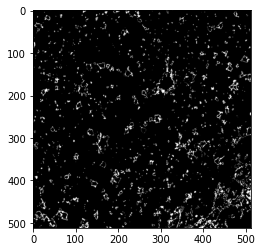

In [ ]:
plt.imshow(mask_dataset[0][:,:,0],cmap='gray')

In [ ]:
def jacard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)

In [ ]:
def jacard_coef_loss(y_true, y_pred):
    return -jacard_coef(y_true, y_pred)  # -1 ultiplied as we want to minimize this value as loss function

In [ ]:

smooth=1
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(im, mask_dataset, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape

(75, 512, 512, 6)

In [ ]:
y_train.shape

(75, 512, 512, 1)

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 0)

In [ ]:
import keras
import tensorflow as tf
from keras.models import Model
from keras import backend as K
from keras.layers import Input, merge, Conv2D, ZeroPadding2D, UpSampling2D, Dense, concatenate, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D, GlobalAveragePooling2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import BatchNormalization, Dropout, Flatten, Lambda
from keras.layers.advanced_activations import ELU, LeakyReLU
from keras.optimizers import Adam, RMSprop, SGD
from keras.regularizers import l2
from keras.layers.noise import GaussianDropout

In [ ]:
smooth = 1.
dropout_rate = 0.3
act = "relu"

In [ ]:

def standard_unit(input_tensor, nb_filter, kernel_size=3):
  x = Conv2D(nb_filter, (kernel_size, kernel_size), activation=act, kernel_initializer = 'he_normal', padding='same')(input_tensor)
  x = Dropout(dropout_rate)(x)
  x = Conv2D(nb_filter, (kernel_size, kernel_size), activation=act, kernel_initializer = 'he_normal', padding='same')(x)
  x = Dropout(dropout_rate)(x)
  return x

In [ ]:

def NEST_Unet():
  inputs =Input((512,512,6))
    #s = concatenate(inputs)
  s=inputs
  nb_filter = [16,32,64,128,256]
  bn_axis=3

  conv1_1 = standard_unit(s, nb_filter=nb_filter[0])
  pool1 = MaxPooling2D((2, 2), strides=(2, 2), name='pool1')(conv1_1)

  conv2_1 = standard_unit(pool1, nb_filter=nb_filter[1])
  pool2 = MaxPooling2D((2, 2), strides=(2, 2), name='pool2')(conv2_1)

  up1_2 = Conv2DTranspose(nb_filter[0], (2, 2), strides=(2, 2), padding='same')(conv2_1)
  conv1_2 = concatenate([up1_2, conv1_1])
  conv1_2 = standard_unit(conv1_2, nb_filter=nb_filter[0])

  conv3_1 = standard_unit(pool2,nb_filter=nb_filter[2])
  pool3 = MaxPooling2D((2, 2), strides=(2, 2))(conv3_1)

  up2_2 = Conv2DTranspose(nb_filter[1], (2, 2), strides=(2, 2),padding='same')(conv3_1)
  conv2_2 = concatenate([up2_2, conv2_1], )
  conv2_2 = standard_unit(conv2_2, nb_filter=nb_filter[1])

  up1_3 = Conv2DTranspose(nb_filter[0], (2, 2), strides=(2, 2), padding='same')(conv2_2)
  conv1_3 = concatenate([up1_3, conv1_1, conv1_2])
  conv1_3 = standard_unit(conv1_3, nb_filter=nb_filter[0])

  conv4_1 = standard_unit(pool3, nb_filter=nb_filter[3])
  pool4 = MaxPooling2D((2, 2), strides=(2, 2), name='pool4')(conv4_1)

  up3_2 = Conv2DTranspose(nb_filter[2], (2, 2), strides=(2, 2), padding='same')(conv4_1)
  conv3_2 = concatenate([up3_2, conv3_1])
  conv3_2 = standard_unit(conv3_2,  nb_filter=nb_filter[2])

  up2_3 = Conv2DTranspose(nb_filter[1], (2, 2), strides=(2, 2),padding='same')(conv3_2)
  conv2_3 = concatenate([up2_3, conv2_1, conv2_2])
  conv2_3 = standard_unit(conv2_3, nb_filter=nb_filter[1])

  up1_4 = Conv2DTranspose(nb_filter[0], (2, 2), strides=(2, 2), padding='same')(conv2_3)
  conv1_4 = concatenate([up1_4, conv1_1, conv1_2, conv1_3])
  conv1_4 = standard_unit(conv1_4, nb_filter=nb_filter[0])

  conv5_1 = standard_unit(pool4, nb_filter=nb_filter[4])

  up4_2 = Conv2DTranspose(nb_filter[3], (2, 2), strides=(2, 2), padding='same')(conv5_1)
  conv4_2 = concatenate([up4_2, conv4_1])
  conv4_2 = standard_unit(conv4_2, nb_filter=nb_filter[3])

  up3_3 = Conv2DTranspose(nb_filter[2], (2, 2), strides=(2, 2),  padding='same')(conv4_2)
  conv3_3 = concatenate([up3_3, conv3_1, conv3_2])
  conv3_3 = standard_unit(conv3_3,nb_filter=nb_filter[2])

  up2_4 = Conv2DTranspose(nb_filter[1], (2, 2), strides=(2, 2), padding='same')(conv3_3)
  conv2_4 = concatenate([up2_4, conv2_1, conv2_2, conv2_3])
  conv2_4 = standard_unit(conv2_4, nb_filter=nb_filter[1])

  up1_5 = Conv2DTranspose(nb_filter[0], (2, 2), strides=(2, 2), name='up15', padding='same')(conv2_4)
  conv1_5 = concatenate([up1_5, conv1_1, conv1_2, conv1_3, conv1_4])
  conv1_5 = standard_unit(conv1_5,nb_filter=nb_filter[0])
  outputs= Conv2D(1, (1, 1), activation='sigmoid', kernel_initializer = 'he_normal', padding='same')(conv1_5)

  model = Model(inputs=[inputs], outputs=[outputs])
  model.compile(optimizer=Adam(lr=1e-4), loss=[dice_coef_loss], metrics=['accuracy',dice_coef,jacard_coef])
  model.summary()
  return model


In [ ]:
model2=NEST_Unet()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 512, 512, 6) 0                                            
__________________________________________________________________________________________________
conv2d_31 (Conv2D)              (None, 512, 512, 16) 880         input_2[0][0]                    
__________________________________________________________________________________________________
dropout_30 (Dropout)            (None, 512, 512, 16) 0           conv2d_31[0][0]                  
__________________________________________________________________________________________________
conv2d_32 (Conv2D)              (None, 512, 512, 16) 2320        dropout_30[0][0]                 
____________________________________________________________________________________________

In [ ]:
del im,mask_dataset,ds


In [ ]:
history = model2.fit(X_train, y_train,  batch_size =5,  verbose=2,   epochs=200 , validation_data=(X_val, y_val))

Epoch 1/200
15/15 - 7s - loss: 0.8126 - accuracy: 0.1064 - dice_coef: 0.1874 - jacard_coef: 0.1052 - val_loss: 0.8200 - val_accuracy: 0.0499 - val_dice_coef: 0.1894 - val_jacard_coef: 0.1070
Epoch 2/200
15/15 - 4s - loss: 0.8076 - accuracy: 0.0693 - dice_coef: 0.1924 - jacard_coef: 0.1079 - val_loss: 0.8175 - val_accuracy: 0.0499 - val_dice_coef: 0.1920 - val_jacard_coef: 0.1087
Epoch 3/200
15/15 - 4s - loss: 0.8093 - accuracy: 0.0575 - dice_coef: 0.1907 - jacard_coef: 0.1081 - val_loss: 0.8161 - val_accuracy: 0.0499 - val_dice_coef: 0.1935 - val_jacard_coef: 0.1096
Epoch 4/200
15/15 - 4s - loss: 0.8026 - accuracy: 0.0536 - dice_coef: 0.1974 - jacard_coef: 0.1104 - val_loss: 0.8157 - val_accuracy: 0.0499 - val_dice_coef: 0.1939 - val_jacard_coef: 0.1099
Epoch 5/200
15/15 - 4s - loss: 0.8040 - accuracy: 0.0521 - dice_coef: 0.1960 - jacard_coef: 0.1109 - val_loss: 0.8136 - val_accuracy: 0.0499 - val_dice_coef: 0.1961 - val_jacard_coef: 0.1113
Epoch 6/200
15/15 - 4s - loss: 0.8025 - accur

In [ ]:
model2.evaluate(X_test,y_test)

1/1 [==============================] - 0s 155ms/step - loss: 0.5460 - accuracy: 0.6680 - dice_coef: 0.4540 - jacard_coef: 0.2937


[0.5460027456283569,
 0.6679668426513672,
 0.4539972245693207,
 0.29365915060043335]

In [ ]:
h=model2.predict(X_test)

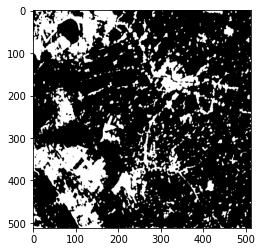

In [ ]:
plt.imshow(h[5][:,:,0],cmap='gray')

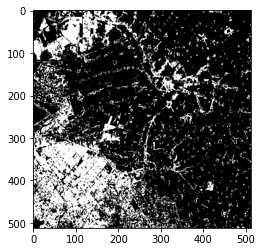

In [ ]:
plt.imshow(y_test[5][:,:,0],cmap='gray')

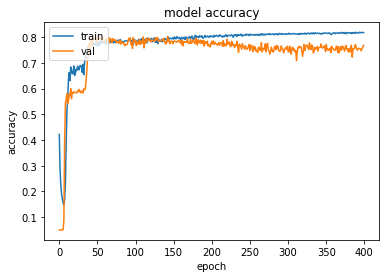

<Figure size 432x288 with 0 Axes>

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig("unet++_accuracy.png")

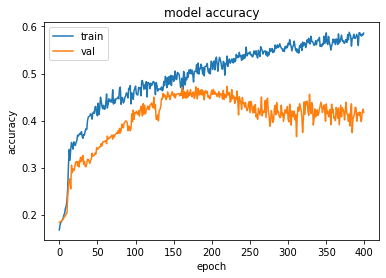

<Figure size 432x288 with 0 Axes>

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['dice_coef'])
plt.plot(history.history['val_dice_coef'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig("unet++_dice_coef.png")

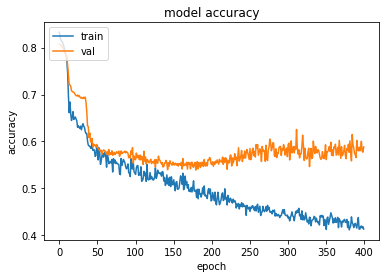

<Figure size 432x288 with 0 Axes>

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig("unet++_loss.png")

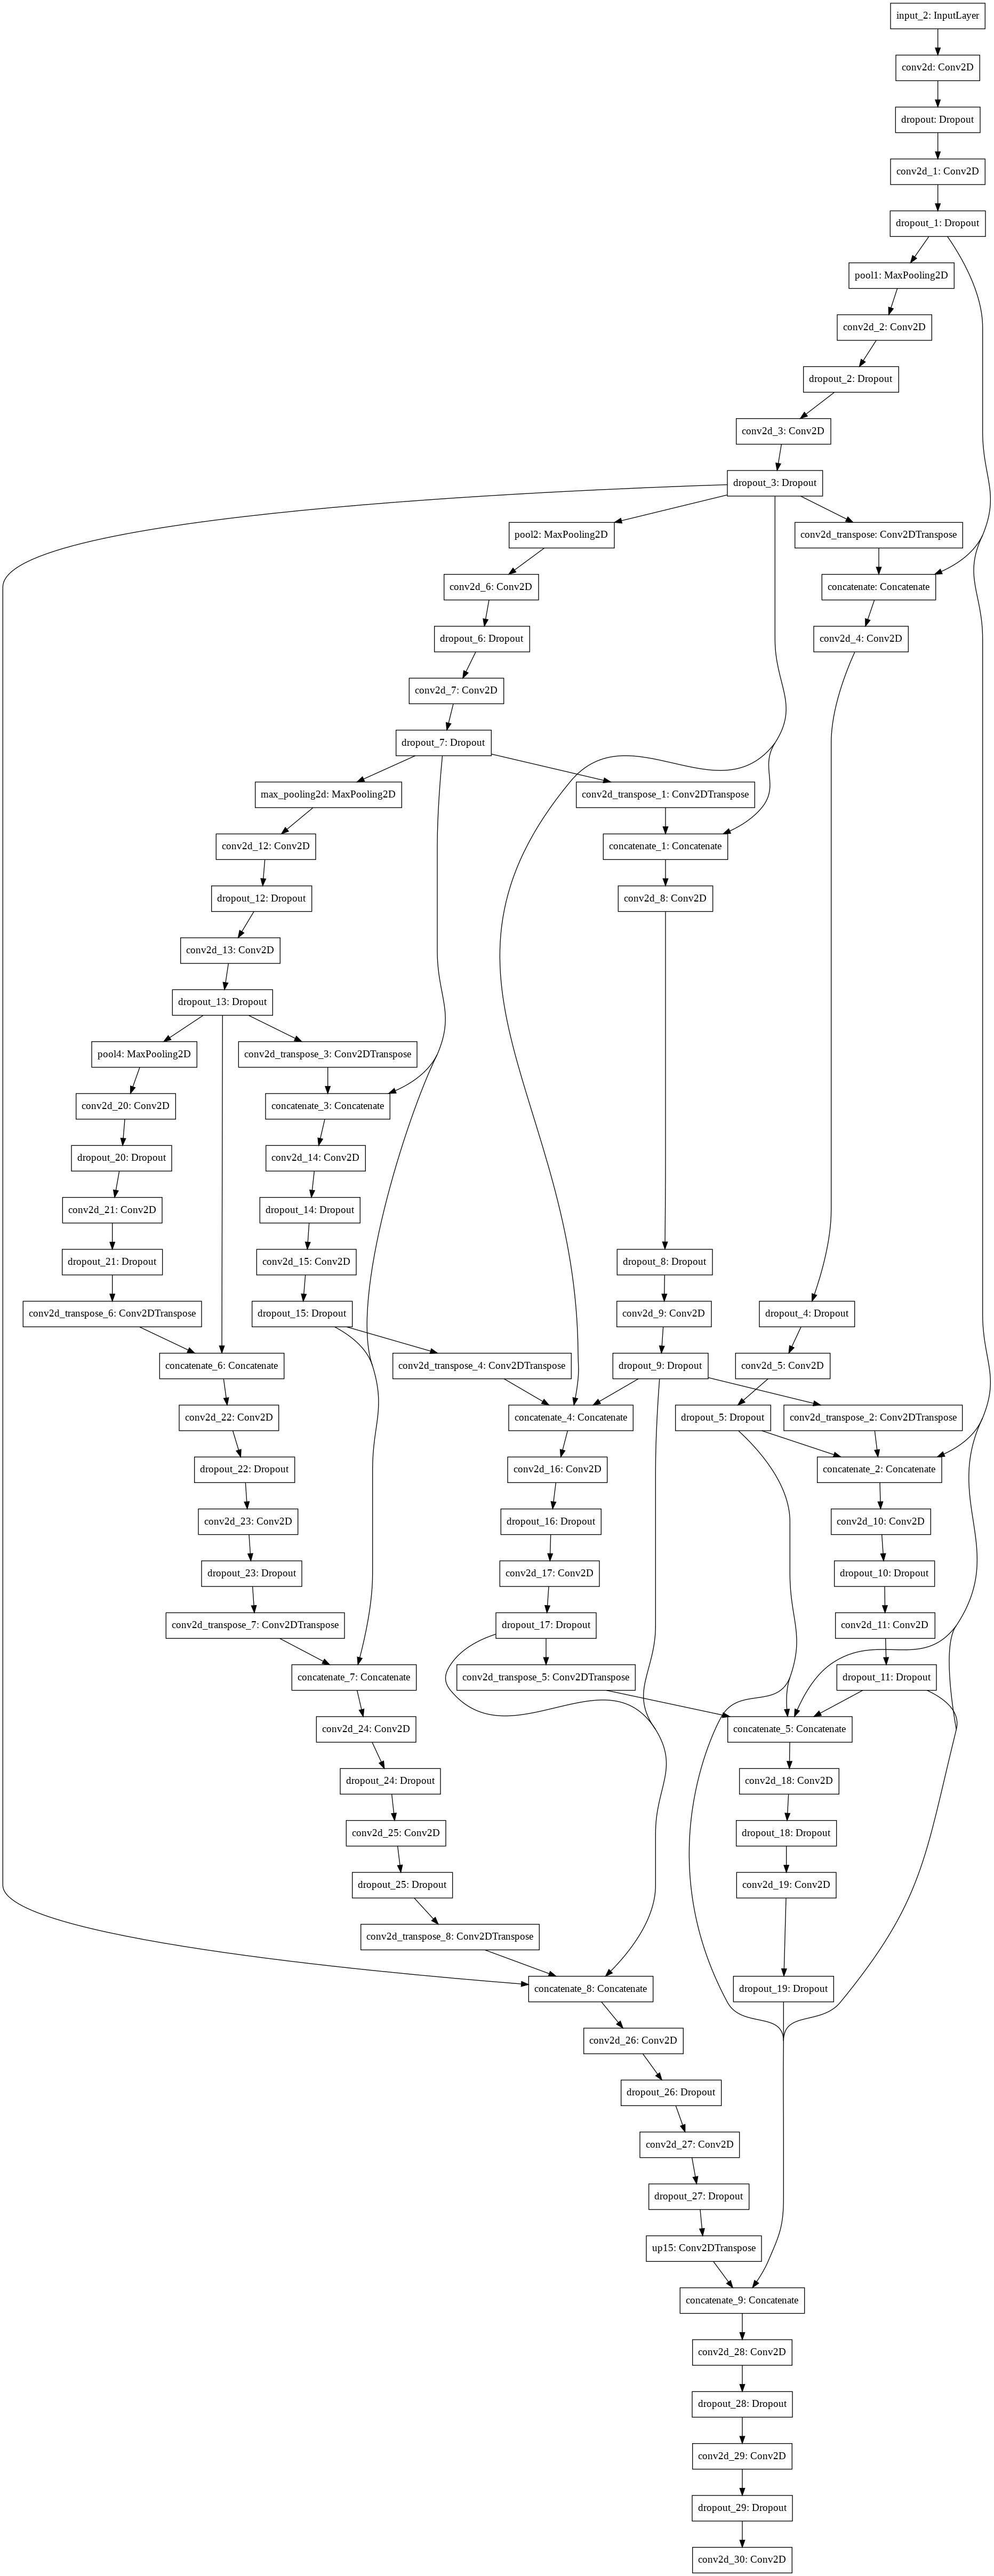

In [ ]:
from keras.utils import plot_model
plot_model(model2,to_file="unet++.png")

In [ ]:
model2.save('unet++.h5')